<a href="https://colab.research.google.com/github/rishikathakre/OIBSIP/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name : Rishika Thakre
## College : P.E.S Modern College of Engineering
## Task 4 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

## To classify if email is spam or ham

## Domain Analysis

- labels : indicating if mail is a spam mail or ham mail
- messages : content of the email

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
%matplotlib inline

## Load Dataset

In [ ]:
data = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [ ]:
data 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data = data[['v1', 'v2']]
data = data.rename(columns={'v2': 'messages', 'v1': 'label'})

In [ ]:
data

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Basic Check

In [ ]:
data.shape

(5572, 2)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Exploratory Data Analysis

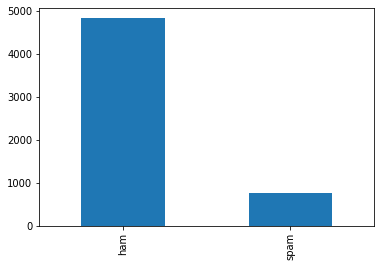

In [ ]:
class_counts = data['v1'].value_counts()
class_counts.plot(kind='bar')
plt.show()

## Data Preprocessing

### Checking missing values

In [ ]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

### Checking duplicate values

In [ ]:
data.duplicated().sum()

403

In [ ]:
data.nunique()

v1       2
v2    5169
dtype: int64

#### Handle missing values

In [ ]:
data['v2'].drop_duplicates(inplace=True)

### Clean text

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [ ]:
data['clean_text'] = data['messages'].apply(clean_text)

In [ ]:
data

,label,messages,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


## Model Training and Testing

In [ ]:
X = data['clean_text']
y = data['label']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)

    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 96.8413496051687
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.99      0.77      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 96.69777458722182
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.75      0.86       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393



In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(alpha=0.01) 
classify(model, X, y)

Accuracy: 98.63603732950466
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1206
        spam       0.99      0.90      0.95       187

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393

